In [1]:
#특정 행렬의 고윳값 분해

In [3]:
import numpy as np
import pprint
pp = pprint.PrettyPrinter(width=41, compact=True)

In [5]:
A = np.array([[3.0, 1.0], [2.0, 2.0]])
w, S = np.linalg.eig(A) #행렬 A의 고윳값을 1차원 배열 w로, 고유벡터 2차원 배열 S로 반환한다.
L = np.diag(w)
print("행렬 A")
pp.pprint(A)
print("고윳값 행렬 L")
pp.pprint(L)
print("고유벡터 행렬 S")
pp.pprint(S)
print("S *L *S ^ -1")
pp.pprint(np.matmul(np.matmul(S, L), np.linalg.inv(S)))

행렬 A
array([[3., 1.],
       [2., 2.]])
고윳값 행렬 L
array([[4., 0.],
       [0., 1.]])
고유벡터 행렬 S
array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]])
S *L *S ^ -1
array([[3., 1.],
       [2., 2.]])


In [6]:
B = np.array([[1.0, 1.0, 0.0], [1.0, 3.0, 1.0], [2.0, -1.0, 1.0]])
w, S = np.linalg.eig(B)
L = np.diag(w)
print("행렬 B")
pp.pprint(B)
print("고윳값 행렬 L")
pp.pprint(L)
print("고유벡터 행렬 S")
pp.pprint(S)
print("S *L *S ^ -1")
pp.pprint(np.matmul(np.matmul(S, L), np.linalg.inv(S)))

행렬 B
array([[ 1.,  1.,  0.],
       [ 1.,  3.,  1.],
       [ 2., -1.,  1.]])
고윳값 행렬 L
array([[3.35930409+0.j        , 0.        +0.j        ,
        0.        +0.j        ],
       [0.        +0.j        , 0.82034796+0.90301315j,
        0.        +0.j        ],
       [0.        +0.j        , 0.        +0.j        ,
        0.82034796-0.90301315j]])
고유벡터 행렬 S
array([[ 0.38955921+0.j        , -0.19155904+0.28662578j,
        -0.19155904-0.28662578j],
       [ 0.91908864+0.j        , -0.22441288-0.22447324j,
        -0.22441288+0.22447324j],
       [-0.05932691+0.j        ,  0.88340332+0.j        ,
         0.88340332-0.j        ]])
S *L *S ^ -1
array([[ 1.00000000e+00-2.42290433e-17j,  1.00000000e+00+5.74918459e-18j,
        -8.46545056e-16-1.82450963e-18j],
       [ 1.00000000e+00+1.79677169e-16j,  3.00000000e+00-9.10962438e-17j,
         1.00000000e+00+3.78161936e-17j],
       [ 2.00000000e+00+1.27182516e-16j, -1.00000000e+00-8.72336096e-17j,
         1.00000000e+00+2.49212557e-17j

2. 선형판별분석과 시각화 코드

In [8]:
import numpy as np
from numpy.matlib import repmat
import matplotlib.pyplot as plt
from scipy import linalg

In [9]:
C1 = np.array([[2., 3.], [2., 4.], [3.,6.],[4.,1.],[4., 4.]])
C2 = np.array([[6., 8.], [8., 7.], [9.,5.],[9.,10.],[10., 8.]])

In [10]:
mu1 = np.mean(C1, axis=0) #c1 데이터의 평균벡터 계산
mu2 = np.mean(C2, axis=0)

In [11]:
print("c1 평균벡터 : ", mu1)
print("c2 평균벡터 : ", mu2)

c1 평균벡터 :  [3.  3.6]
c2 평균벡터 :  [8.4 7.6]


In [12]:
S1 = np.cov(C1.T) * (C1.shape[0] - 1)
S2 = np.cov(C2.T) * (C2.shape[0] - 1)

In [13]:
Sw = S1 + S2 #부류 내의 산포 행렬의 합 ??? 
#산포행렬??

In [14]:
print("c1에 대한 부류 내의 산포 행렬 :", S1)
print("c2에 대한 부류 내의 산포 행렬 :", S2)
print("c1, c2에 대한 부류 내의 산포 행렬의 합 :", Sw)

c1에 대한 부류 내의 산포 행렬 : [[ 4.  -2. ]
 [-2.  13.2]]
c2에 대한 부류 내의 산포 행렬 : [[ 9.2 -0.2]
 [-0.2 13.2]]
c1, c2에 대한 부류 내의 산포 행렬의 합 : [[13.2 -2.2]
 [-2.2 26.4]]


In [15]:
Sb = (mu1 - mu2).reshape(2,1).dot((mu1 - mu2).reshape(1,2))

In [16]:
#부류 간의 산포 행렬 계산
print("부류 간의 산포 행렬 :", Sb)

부류 간의 산포 행렬 : [[29.16 21.6 ]
 [21.6  16.  ]]


In [17]:
D, U = linalg.eig(linalg.inv(Sw).dot(Sb)) #Sw -1 Sb 의 고윳값 계싼

In [18]:
print("Sw ^ -1 * Sb의 고윳값 :", D)
wLDA = U[:, 0]

Sw ^ -1 * Sb의 고윳값 : [3.13137004+0.j 0.        +0.j]


In [19]:
print("LDA 정사영 벡터 :", wLDA)

LDA 정사영 벡터 : [0.91955932 0.39295122]


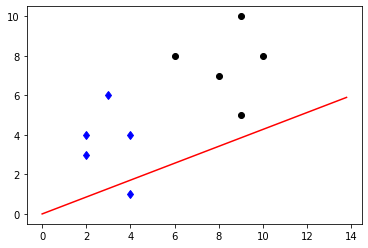

In [20]:
plt.figure(1)
plt.plot(C1[:, 0], C1[:,1], 'bd')
plt.plot(C2[:, 0], C2[:,1], 'ko')
plt.plot([0, wLDA[0] * 15], [0, wLDA[1] * 15], 'r') #정사영 벡터
plt.show()